In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

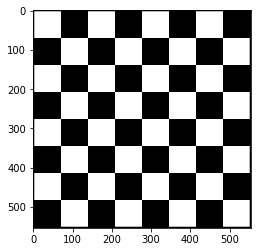

In [23]:
#RGB to grayscale
image=cv2.imread('chess.png')
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

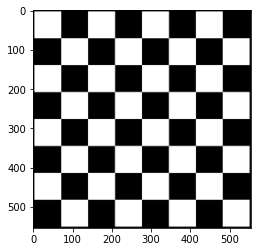

In [24]:
#Applying gaussian filter to smoothen the image
I_g=cv2.GaussianBlur(gray,(5,5),1)
plt.imshow(I_g,cmap='gray')

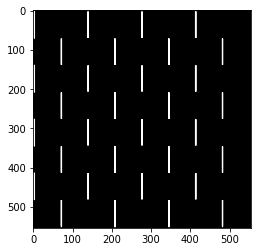

In [13]:
#Appying the sobel filter in two directions to obtain the derivatives in the respective directions
#Sobel in x
kernel_Sobel_x = np.array([[-1,0,+1],[-2,0,+2],[-1,0,+1]])
I_x=cv2.filter2D(I_g,-1,kernel_Sobel_x).astype('float64')
plt.imshow(I_x,cmap='gray')

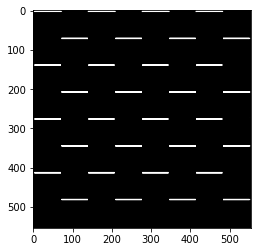

In [14]:
#Sobel in y
kernel_Sobel_y = np.array([[-1,-2,-1], [0,0,0], [+1,+2,+1]])
I_y=cv2.filter2D(I_g,-1,kernel_Sobel_y).astype('float64')
plt.imshow(I_y,cmap='gray')

In [15]:
#Double derivatives are calculated for the matrix as per Harris' algorithm
I_xx = np.square(I_x)
I_yy = np.square(I_y)
I_xy = np.multiply(I_x, I_y)
I_yx= np.multiply(I_y, I_x)

In [29]:
#Gaussian blur is applied to avoid abrupt noises that can be miscounted as corners
I_xx = cv2.GaussianBlur(I_xx,(5, 5),1.4)
I_yy = cv2.GaussianBlur(I_yy,(5, 5),1.4)
I_xy = cv2.GaussianBlur(I_xy,(5, 5),1.4)
I_yx = cv2.GaussianBlur(I_yx,(5, 5),1.4)

In [25]:
#The 'R' metric is calculated for all the pixels as per Harris' algorithm which later decides the classification for corners
k=0.06 
R=np.zeros((I_xx.shape[0],I_xx.shape[1]),np.float32)
for i in range(1,I_xx.shape[0]-1):
    for j in range(1,I_xx.shape[1]-1):
        M=np.asarray([[I_xx[i][j],I_xy[i][j]],[I_yx[i][j],I_yy[i][j]]])
        R[i][j]=np.linalg.det(M)-(k*np.square(np.trace(M))) # Instead of the lambda1,lambda2 direct determinant and trace are used as per the characteristic equation of a matrix method

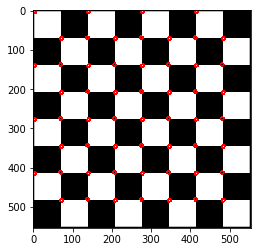

In [35]:
#The threshold for a corner is decided by iterating over the image and getting optimal response
threshold = 40000
final=np.copy(imgRGB)
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if R[i][j]>threshold:
            max = R[i][j]
            c=0
            for k in range(3):# This non-maximal suppression is carried out for blocks to avoid concentration of pixels arounf corners
                for l in range(3):
                    if i+k-1<R.shape[0] and j+l-1<R.shape[1]:
                        if R[i+k-1][j+l-1]>max:
                            c=1
                            break
            if c==0:
                cv2.circle(final,(j,i),4,(255,0,0),4)
plt.imshow(final)